## 두 가지 머신러닝 모델 만들기
* 첫번째 모델 : 순위 예측 모델 만들기
* 두번째 모델 : 금은동 메달 개수 입력시 해당 팀명 출력하는 모델

### 모듈 및 데이터 불러옴

In [109]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [110]:
medal = pd.read_csv("medal2.csv")
medal

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total,Team/NOC_lbl
0,1,United States of America,39,41,33,113,1,90
1,2,People's Republic of China,38,32,18,88,2,64
2,3,Japan,27,14,17,58,5,45
3,4,Great Britain,22,21,22,65,4,33
4,5,ROC,20,28,23,71,3,70
...,...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77,32
89,86,Grenada,0,0,1,1,77,35
90,86,Kuwait,0,0,1,1,77,50
91,86,Republic of Moldova,0,0,1,1,77,72


## 첫번째 모델
* Knn 모델

### 데이터 나누기 

In [111]:
sel = ['Gold', "Silver", "Bronze" ]

X_n = medal[sel]
y_n = medal['Rank']

X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n,y_n,
                                                   random_state=1)

In [112]:
knn = KNeighborsClassifier()
knn.fit(X_n_train,y_n_train)

KNeighborsClassifier()

In [113]:
pred = knn.predict(X_n_test)
pred

array([59, 86, 48, 59, 86, 77, 59, 48, 72, 59, 59, 27, 86, 21, 59, 59, 12,
        4, 86, 86, 72, 26, 86, 31], dtype=int64)

In [114]:
knn_tr = knn.score(X_n_train, y_n_train)
knn_test = knn.score(X_n_test, y_n_test)
knn_tr, knn_test

(0.4057971014492754, 0.25)

In [115]:
print("훈련 데이터셋 정확도 : {:.2f}".format(knn_tr))
print("테스트 데이터 셋 정확도 : {:.2f}".format(knn_test))

훈련 데이터셋 정확도 : 0.41
테스트 데이터 셋 정확도 : 0.25


### 성능향상
* K값에 따른 정확도 구하기

In [116]:
tr_knn = []
test_knn = []
k_nums = range(1,22,2)

for n in k_nums:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_n_train,y_n_train)
    
    knn_tr = knn.score(X_n_train, y_n_train)
    knn_test = knn.score(X_n_test, y_n_test)
    
    tr_knn.append(knn_tr)
    test_knn.append(knn_test)
    
    print("k :", n)
    print("학습용셋 정확도 : {:.3f}".format(knn_tr))
    print("테스트용 셋 정확도 : {:.3f}".format(knn_test))   

k : 1
학습용셋 정확도 : 1.000
테스트용 셋 정확도 : 0.417
k : 3
학습용셋 정확도 : 0.464
테스트용 셋 정확도 : 0.292
k : 5
학습용셋 정확도 : 0.406
테스트용 셋 정확도 : 0.250
k : 7
학습용셋 정확도 : 0.377
테스트용 셋 정확도 : 0.250
k : 9
학습용셋 정확도 : 0.246
테스트용 셋 정확도 : 0.208
k : 11
학습용셋 정확도 : 0.188
테스트용 셋 정확도 : 0.208
k : 13
학습용셋 정확도 : 0.159
테스트용 셋 정확도 : 0.208
k : 15
학습용셋 정확도 : 0.159
테스트용 셋 정확도 : 0.208
k : 17
학습용셋 정확도 : 0.087
테스트용 셋 정확도 : 0.042
k : 19
학습용셋 정확도 : 0.087
테스트용 셋 정확도 : 0.042
k : 21
학습용셋 정확도 : 0.087
테스트용 셋 정확도 : 0.042


In [117]:
import seaborn as sns

In [118]:
dat = {"train_score":tr_knn, "test_score":test_knn}
data_df = pd.DataFrame(dat, index=range(1,22,2))
data_df

,train_score,test_score
1,1.000000,0.416667
3,0.463768,0.291667
5,0.405797,0.250000
7,0.376812,0.250000
9,0.246377,0.208333
11,0.188406,0.208333
13,0.159420,0.208333
15,0.159420,0.208333
17,0.086957,0.041667
19,0.086957,0.041667


In [119]:
import matplotlib.pyplot as plt

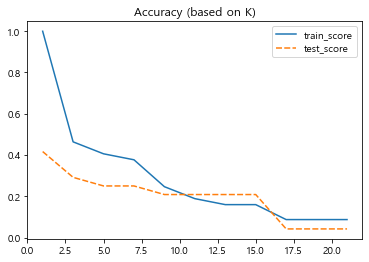

In [120]:
sns.lineplot(data=data_df, palette="tab10")
plt.title("Accuracy (based on K)")
plt.show()

* 테스트 사이즈에 따른 정확도

In [121]:
for i in range(1,6,1):
    X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n,y_n,
                                                       test_size=(i/10),
                                                       random_state=3)
    knn = KNeighborsClassifier(n_neighbors=1).fit(X_n_train,y_n_train)
    
    tr_score = knn.score(X_n_train,y_n_train)
    test_score = knn.score(X_n_test,y_n_test)
    print("학습용 : {}, 테스트용 : {}".format(10-i, i))
    print("학습용 : {:.3f}, 테스트용 : {:.3f}\n ".format(tr_score, test_score))

학습용 : 9, 테스트용 : 1
학습용 : 1.000, 테스트용 : 0.500
 
학습용 : 8, 테스트용 : 2
학습용 : 1.000, 테스트용 : 0.526
 
학습용 : 7, 테스트용 : 3
학습용 : 1.000, 테스트용 : 0.500
 
학습용 : 6, 테스트용 : 4
학습용 : 1.000, 테스트용 : 0.395
 
학습용 : 5, 테스트용 : 5
학습용 : 1.000, 테스트용 : 0.362
 


In [122]:
X_n = medal[sel]
y_n = medal['Rank']

X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n,y_n,
                                                    test_size = 0.1,
                                                   random_state=1)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_n_train,y_n_train)
pred = knn.predict(X_n_test)

print("Knn 모델 정확도 : ",knn.score(X_n_test, y_n_test))

Knn 모델 정확도 :  0.7


In [123]:
mse_val = ( (pred - y_test) **2).sum() / len(pred)
print("MSE :", mse_val)
print("RMSE :{:.3f}". format(mse_val **0.5))

MSE : 1.8
RMSE :1.342


In [124]:
medal.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total,Team/NOC_lbl
0,1,United States of America,39,41,33,113,1,90
1,2,People's Republic of China,38,32,18,88,2,64
2,3,Japan,27,14,17,58,5,45
3,4,Great Britain,22,21,22,65,4,33
4,5,ROC,20,28,23,71,3,70


### medal
 * 성능을 올리기 위해 Gold * 1000, Silver * 100, Bronze * 10 컬럼을 만들어 보기 
    

In [125]:
medal['Gold_1000'] = medal['Gold'] * 1000
medal['Silver_100'] = medal['Silver'] * 100
medal['Bronze_10'] = medal['Bronze'] * 10

In [126]:
medal.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total,Team/NOC_lbl,Gold_1000,Silver_100,Bronze_10
0,1,United States of America,39,41,33,113,1,90,39000,4100,330
1,2,People's Republic of China,38,32,18,88,2,64,38000,3200,180
2,3,Japan,27,14,17,58,5,45,27000,1400,170
3,4,Great Britain,22,21,22,65,4,33,22000,2100,220
4,5,ROC,20,28,23,71,3,70,20000,2800,230


In [129]:
sel_1000 = ['Gold_1000', "Silver_100", "Bronze_10" ]

X_1000 = medal[sel_1000]
y_1000 = medal['Rank']

X_1000_train, X_1000_test, y_1000_train, y_1000_test  = train_test_split(X_1000,y_1000,random_state=1)

In [130]:
knn_1000 = KNeighborsClassifier()
knn_1000.fit(X_1000_train,y_1000_train)

KNeighborsClassifier()

In [131]:
print( knn_1000.predict(X_1000_test))

[59 77 46 59 86 77 59 48 48 42 42 26 86 26 42 59 12  1 86 77 50 17 86 42]


In [132]:
knn_1000_tr = knn_1000.score(X_1000_train, y_1000_train)
knn_1000_test = knn_1000.score(X_1000_test, y_1000_test)
knn_1000_tr, knn_1000_test


(0.4057971014492754, 0.25)

In [133]:
print("훈련 데이터셋 정확도 : {:.2f}".format(knn_1000_tr))
print("테스트 데이터 셋 정확도 : {:.2f}".format(knn_1000_test))

훈련 데이터셋 정확도 : 0.41
테스트 데이터 셋 정확도 : 0.25


* 가중치에 따른 성능 변화가 없음

### Total
 * Total 컬럼추가하였을 때 성능 변화

In [150]:
sel_t = ['Gold', "Silver", "Bronze" ,"Total"]

X_t = medal[sel_t]
y_t = medal['Rank']

X_t_train, X_t_test, y_t_train,y_t_test=train_test_split(X_t,y_t,random_state=1)

In [151]:
knn_t = KNeighborsClassifier()
knn_t.fit(X_t_train,y_t_train)

KNeighborsClassifier()

In [152]:
print( knn_t.predict(X_t_test))

[59 86 26 72 86 77 63 29 36 59 59 27 86 21 59 72 12  4 86 86 29 21 86 50]


In [153]:
knn_t_tr = knn_t.score(X_t_train, y_t_train)
knn_t_test = knn_t.score(X_t_test, y_t_test)
knn_t_tr, knn_t_test

(0.4057971014492754, 0.2916666666666667)

In [154]:
print("훈련 데이터셋 정확도 : {:.2f}".format(knn_t_tr))
print("테스트 데이터 셋 정확도 : {:.2f}".format(knn_t_test))

훈련 데이터셋 정확도 : 0.41
테스트 데이터 셋 정확도 : 0.29


* 테스트 셋의 정확도가 미세하게 높아져서 훈련 데이터셋과 테스트 데이터 셋의 정확도 차이가 미비하게 줄어듦
    * 성능이 약간 상승

## 다양한 모델 비교

In [155]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [156]:
model_score_n = []
model_mse_n = []
model_sub_n = []

In [157]:
sel = ['Gold', "Silver", "Bronze" ,"Total"]

X = medal[sel]
y = medal['Rank']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.1,
                                                   random_state=1)

In [158]:
model1 = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
pred = model1.predict(X_test)

model1_tr_score = model1.score(X_train,y_train)
model1_score = model1.score(X_test,y_test)

print("KNN 모델 학습용 정확도 : ", model1_tr_score)
print("KNN 모델 테스트용 정확도: ", model1_score)

mse_val1 = ( (pred - y_test) **2).sum() / len(pred)
print("MSE :", mse_val1)
print("RMSE :{:.3f}". format(mse_val1 **0.5))

sub1 = model1_tr_score - model1_score
print("오차 :{:.3f} ".format(sub1))

model_score_n.append(model1_score)
model_mse_n.append(mse_val1)
model_sub_n.append(sub1)


KNN 모델 학습용 정확도 :  1.0
KNN 모델 테스트용 정확도:  0.7
MSE : 29.7
RMSE :5.450
오차 :0.300 


In [159]:
model2 = LogisticRegression().fit(X_train, y_train)
pred2 = model2.predict(X_test)

model2_tr_score = model2.score(X_train,y_train)
model2_score = model2.score(X_test,y_test)

print("Logistic 모델 학습용 정확도 :{:.3f} ".format(model2_tr_score))
print("Logistic 테스트용 정확도:{:.3f} ".format(model2_score))

mse_val2 = ( (pred2 - y_test) **2).sum() / len(pred2)
print("MSE :", mse_val2)
print("RMSE :{:.3f}". format(mse_val2 **0.5))

sub2 = model2_tr_score - model2_score
print("오차 :{:.3f} ".format(sub2))

model_score_n.append(model2_score)
model_mse_n.append(mse_val2)
model_sub_n.append(sub2)


Logistic 모델 학습용 정확도 :0.578 
Logistic 테스트용 정확도:0.200 
MSE : 314.9
RMSE :17.745
오차 :0.378 


C:\Users\hingu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [160]:
model3 = LinearSVC().fit(X_train, y_train)
pred3 = model3.predict(X_test)

model3_tr_score = model3.score(X_train,y_train)
model3_score = model3.score(X_test,y_test)

print("SVC 모델 학습용 정확도 :{:.3f} ".format(model3_tr_score))
print("SVC 테스트용 정확도:{:.3f} ".format(model3_score))

mse_val3 = ( (pred3 - y_test) **2).sum() / len(pred3)
print("MSE :", mse_val3)
print("RMSE :{:.3f}". format(mse_val3 **0.5))

sub3 = model3_tr_score - model3_score
print("오차 :{:.3f} ".format(sub3))

model_score_n.append(model3_score)
model_mse_n.append(mse_val3)
model_sub_n.append(sub3)



SVC 모델 학습용 정확도 :0.422 
SVC 테스트용 정확도:0.500 
MSE : 362.0
RMSE :19.026
오차 :-0.078 


C:\Users\hingu\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [161]:
model4 = RandomForestClassifier().fit(X_train, y_train)
pred4 = model4.predict(X_test)

model4_tr_score = model4.score(X_train,y_train)
model4_score = model4.score(X_test,y_test)

print("RF 모델 학습용 정확도 :{:.3f} ".format(model4_tr_score))
print("RF 테스트용 정확도:{:.3f} ".format(model4_score))

mse_val4 = ( (pred4 - y_test) **2).sum() / len(pred4)
print("MSE :", mse_val4)
print("RMSE :{:.3f}". format(mse_val4 **0.5))

sub4 = model4_tr_score - model4_score
print("오차 :{:.3f} ".format(sub4))

model_score_n.append(model4_score)
model_mse_n.append(mse_val4)
model_sub_n.append(sub4)


RF 모델 학습용 정확도 :1.000 
RF 테스트용 정확도:0.700 
MSE : 1.8
RMSE :1.342
오차 :0.300 


In [162]:
model5 = DecisionTreeClassifier().fit(X_train,y_train)
pred5 = model5.predict(X_test)

model5_tr_score = model5.score(X_train,y_train)
model5_score = model5.score(X_test, y_test)

print("D.tree 모델 학습용 정확도 :{:.3f} ".format(model5_tr_score))
print("D.tree 테스트용 정확도:{:.3f} ".format(model5_score))

mse_val5 = ( (pred5 - y_test) **2).sum() / len(pred5)
print("MSE :", mse_val5)
print("RMSE :{:.3f}". format(mse_val5 **0.5))

sub5 = model5_tr_score - model5_score
print("오차 :{:.3f} ".format(sub5))

model_score_n.append(model5_score)
model_mse_n.append(mse_val5)
model_sub_n.append(sub5)


D.tree 모델 학습용 정확도 :1.000 
D.tree 테스트용 정확도:0.700 
MSE : 1.4
RMSE :1.183
오차 :0.300 


In [163]:
model6 = GradientBoostingClassifier().fit(X_train, y_train)
pred6 = model6.predict(X_test)

model6_tr_score = model6.score(X_train,y_train)
model6_score = model6.score(X_test, y_test)

print("D.tree 모델 학습용 정확도 :{:.3f} ".format(model6_tr_score))
print("D.tree 테스트용 정확도:{:.3f} ".format(model6_score))

mse_val6 = ( (pred6 - y_test) **2).sum() / len(pred6)
print("MSE :", mse_val6)
print("RMSE :{:.3f}". format(mse_val6 **0.5))

sub6 = model6_tr_score - model6_score
print("오차 :{:.3f} ".format(sub6))

model_score_n.append(model6_score)
model_mse_n.append(mse_val6)
model_sub_n.append(sub6)

D.tree 모델 학습용 정확도 :1.000 
D.tree 테스트용 정확도:0.700 
MSE : 40.2
RMSE :6.340
오차 :0.300 


In [164]:
model_info = ["KNN 모델", "Logistic 모델", "SVC 모델", "RF 모델", 
              "D.tree모델", "Gradient 모델"]
dic_dict = {"모델" : model_info, "정확도": model_score_n, "오차":model_sub_n
            ,"MSE":model_mse_n}
dat = pd.DataFrame(dic_dict)

In [88]:
dat

,모델,정확도,오차,MSE
0,KNN 모델,0.7,0.300000,29.7
1,Logistic 모델,0.2,0.378313,314.9
2,SVC 모델,0.5,-0.078313,151.9
3,RF 모델,0.7,0.300000,1.8
4,D.tree모델,0.7,0.300000,56.3
5,Gradient 모델,0.7,0.300000,18.2


In [99]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   




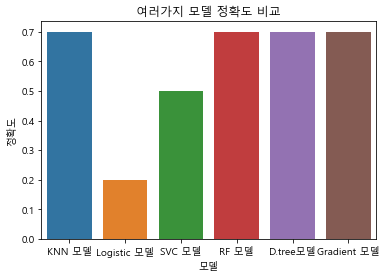

In [100]:
sns.barplot(x=dat["모델"], y=dat["정확도"])
plt.title("여러가지 모델 정확도 비교")
plt.show()

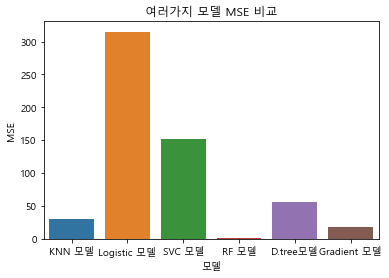

In [101]:
sns.barplot(x=dat["모델"], y=dat["MSE"])
plt.title("여러가지 모델 MSE 비교")
plt.show()


## 결론
[knn 모델]
* k값의 따른 정확도는 k=3일때 학습용과 테스트용의 정확도차이가 가장 적다.
* test size를 조정하여 구한 학습용과 테스트용의 최적비율은 학습용9 : 테스트용1 이다.
* 성능 개선을 위해 금/은/동 메달에 가중치값을 달리하였을 때, 성능이 개선되지 않았다.
* 반면, 피쳐에 전체 매달 개수를 추가하였을 때 약간의 성능이 개선되었다.

[여러가지 모델 비교]
* KNeighborsClassifier, LogisticRegression, LinearSVC, RandomForestClassifier, DecisionTreeClassifier, GradientBoostingClassifier 모델을 비교하였을 때, logistic 모델과 SVC 모델을 제외한 모든 모델들의 정확도가 0.7로 가장 높았다.
* MSE가 가장 낮게 나온 모델은 RandomForestClassifier 모델로 수치는 1.8이다.
* 따라서 가장 최적의 모델은 RandomForestClassifier이다.